# índice Notas

## Pacotes

In [1]:
import pandas as pd #pacote para manipulação de dados
import matplotlib.pyplot as plt # pacote para criar gráficos
import numpy as np

import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8) # define o tamanho padrão dos gráficos criados


### Importação dos Dados

In [2]:
path = r"D:\UFPR\2º Semestre 2021\Estatística Econômica e Introdução à Econometria\1. Relatório Enade\2018\3.DADOS\microdados_enade_2018.txt"
enade = pd.read_table(path, sep=';', decimal=',')

# ANTES DE EXECUTAR O FILTRO, DROPAR AS NOTAS ZERO DA BASE

In [22]:
notas = enade.filter(['CO_IES', 'NT_GER']).dropna()

In [23]:
notas = notas[notas.NT_GER != 0]

In [66]:
notas.iloc[51302:51303,1:2]

,NT_GER
337618,24.4


In [6]:
461717 / 9 

51301.88888888889

In [37]:
notas.sort_values('NT_GER',ascending=True, inplace=True)

### função que acha o decil(4 ou 9)

In [62]:
np.quantile(notas['NT_GER'], 0.1)

23.7

In [12]:
np.quantile(notas.where(notas.CO_IES == 571)['NT_GER'].dropna(), 0.1)

29.7

### cria a tabela para cada universidade pelo decil

In [6]:
notas40 = notas.where((notas.CO_IES == 571) & (notas.NT_GER <= 37.2)).dropna() 

In [7]:
notas40['NT_GER'].mean()

25.355288461538464

IDDE

In [68]:
ies = notas['CO_IES'].drop_duplicates().sort_values()
    

In [96]:
notas_universidades = notas.groupby('CO_IES').mean()

In [97]:
notas_universidades

,NT_GER
CO_IES,
1,48.090672
2,57.622274
3,50.038643
4,47.197063
5,43.681995
...,...
19861,41.288235
19862,47.061111
19863,56.258824


In [98]:
notas_universidades.reset_index(inplace=True)

In [71]:
notas_universidades

,CO_IES,NT_GER
0,1,48.090672
1,2,57.622274
2,3,50.038643
3,4,47.197063
4,5,43.681995
...,...,...
1746,19861,41.288235
1747,19862,47.061111
1748,19863,56.258824
1749,20478,51.810000


In [74]:
decis = pd.DataFrame(columns=('decil40', 'decil90'))
for i in ies:
    quartodecil = np.quantile(notas.where(notas.CO_IES == i)['NT_GER'].dropna(), 0.4)
    media40 = notas.where((notas.CO_IES == i) & (notas.NT_GER <= quartodecil)).dropna() 

    nonodecil = np.quantile(notas.where(notas.CO_IES == i)['NT_GER'].dropna(), 0.9)
    media90 = notas.where((notas.CO_IES == i) & (notas.NT_GER >= nonodecil)).dropna() 
    
    new_row = {'decil40': media40['NT_GER'].mean(), 'decil90': media90['NT_GER'].mean()}
    decis = decis.append(new_row, ignore_index=True)

decis

,decil40,decil90
0,33.603241,73.131481
1,43.250580,79.180132
2,35.067602,74.796939
3,32.713919,72.244286
4,29.547590,69.856452
...,...,...
1746,30.937500,64.150000
1747,30.842857,72.050000
1748,43.342857,74.950000
1749,40.133333,73.966667


In [76]:
decis.reset_index(inplace=True)

In [99]:
notas_universidades['D40'] = 0
notas_universidades['D90'] = 0

In [100]:
notas_universidades['D40'] = decis['decil40']
notas_universidades['D90'] = decis['decil90']

In [101]:
notas_universidades['IDDE'] = notas_universidades['D90'] / notas_universidades['D40']

In [111]:
notas_universidades['Amplitude'] = notas_universidades['D90'] -  notas_universidades['D40']

In [147]:
notas_universidades

,CO_IES,NT_GER,D40,D90,IDDE,Amplitude
0,1,48.090672,33.603241,73.131481,2.176322,39.528241
1,2,57.622274,43.250580,79.180132,1.830730,35.929552
2,3,50.038643,35.067602,74.796939,2.132936,39.729337
3,4,47.197063,32.713919,72.244286,2.208365,39.530366
4,5,43.681995,29.547590,69.856452,2.364201,40.308861
...,...,...,...,...,...,...
1746,19861,41.288235,30.937500,64.150000,2.073535,33.212500
1747,19862,47.061111,30.842857,72.050000,2.336035,41.207143
1748,19863,56.258824,43.342857,74.950000,1.729235,31.607143
1749,20478,51.810000,40.133333,73.966667,1.843023,33.833333


## Gráficos

### IDDE

Text(0.02, 0.65, '$\\mu= 2.19,\\ Med=2.21,\\ \\sigma=0.29$')

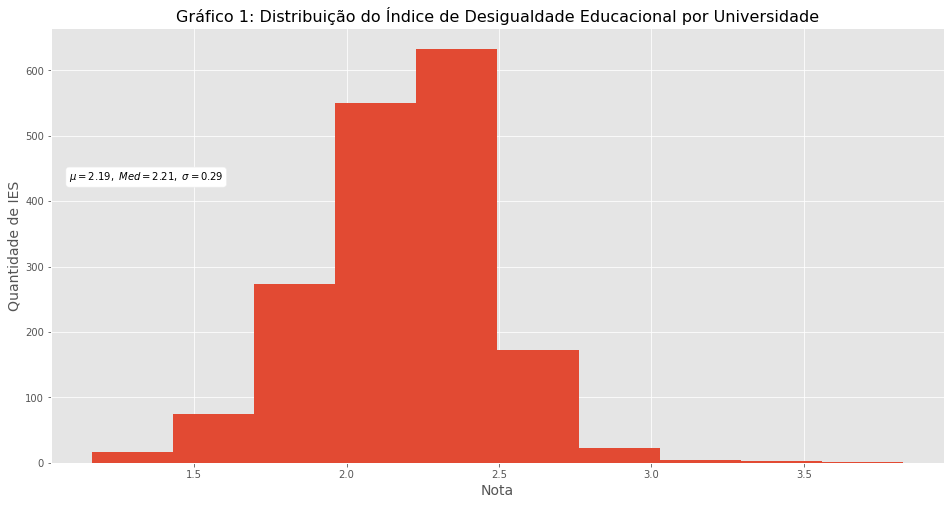

In [242]:
media_idde = notas_universidades['IDDE'].mean()
mediana_idde = notas_universidades['IDDE'].median()
desvio_idde = np.std(notas_universidades['IDDE'])

plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.hist(notas_universidades['IDDE'])
ax.set_title('Gráfico 1: Distribuição do Índice de Desigualdade Educacional por Universidade', size=16)
ax.set_xlabel('Nota', size=14)
ax.set_ylabel('Quantidade de IES', size=14)
ax.text(0.02,
    0.65, 
    f'$\mu= {media_idde:.2f},\ Med={mediana_idde:.2f},\ \sigma={desvio_idde:.2f}$', 
    transform=ax.transAxes, 
    fontsize=10, 
    bbox={'boxstyle':'round','facecolor':'white','alpha':1})


Média Geral

Text(0.02, 0.65, '$\\mu= 40.64,\\ Med=40.01,\\ \\sigma=6.42$')

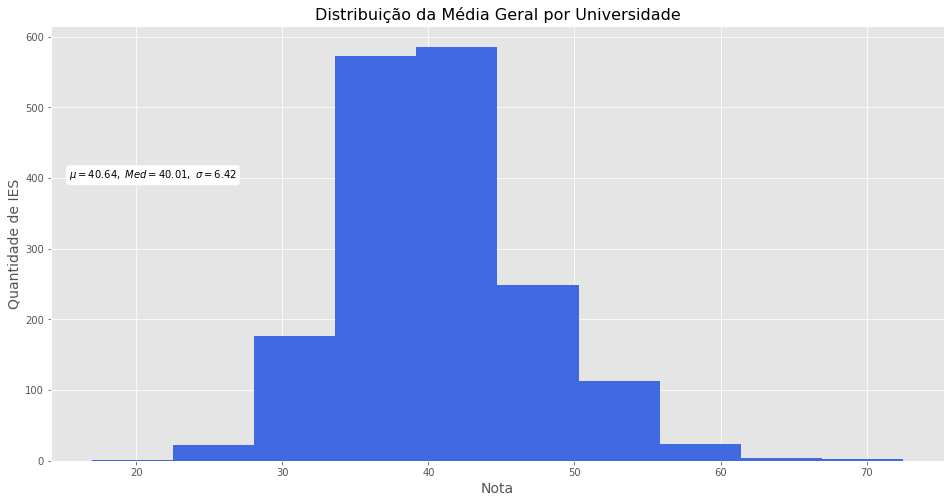

In [151]:
media_ntger = notas_universidades['NT_GER'].mean()
mediana_ntger = notas_universidades['NT_GER'].median()
desvio_ntger = np.std(notas_universidades['NT_GER'])

plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.hist(notas_universidades['NT_GER'], color='royalblue')
ax.set_title('Distribuição da Média Geral por Universidade', size=16)
ax.set_xlabel('Nota', size=14)
ax.set_ylabel('Quantidade de IES', size=14)
ax.text(0.02,
    0.65, 
    f'$\mu= {media_ntger:.2f},\ Med={mediana_ntger:.2f},\ \sigma={desvio_ntger:.2f}$', 
    transform=ax.transAxes, 
    fontsize=10, 
    bbox={'boxstyle':'round','facecolor':'white','alpha':1})


### Amplitude

Text(0.02, 0.65, '$\\mu= 33.18,\\ Med=34.20,\\ \\sigma=5.61$')

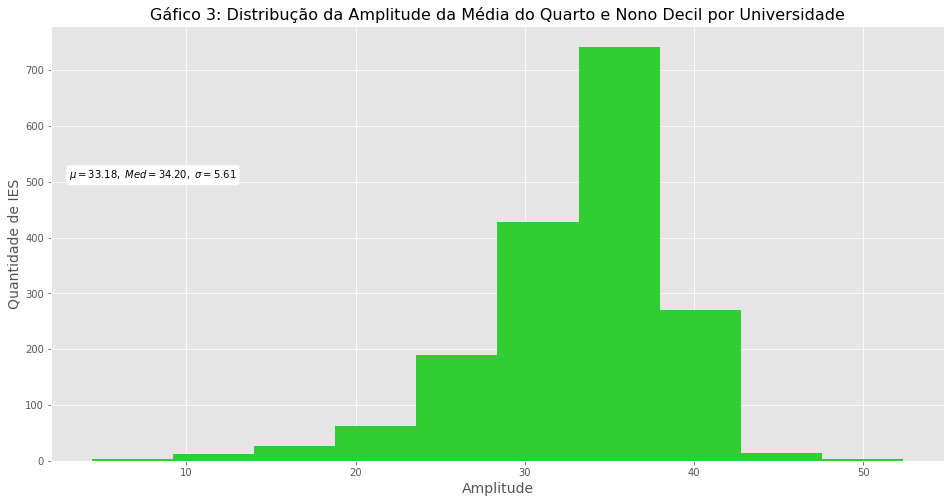

In [243]:
media_amp = notas_universidades['Amplitude'].mean()
mediana_amp = notas_universidades['Amplitude'].median()
desvio_amp = np.std(notas_universidades['Amplitude'])

plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.hist(notas_universidades['Amplitude'], color='limegreen')
ax.set_title('Gáfico 3: Distribução da Amplitude da Média do Quarto e Nono Decil por Universidade', size=16)
ax.set_xlabel('Amplitude', size=14)
ax.set_ylabel('Quantidade de IES', size=14)
ax.text(0.02,
    0.65, 
    f'$\mu= {media_amp:.2f},\ Med={mediana_amp:.2f},\ \sigma={desvio_amp:.2f}$', 
    transform=ax.transAxes, 
    fontsize=10, 
    bbox={'boxstyle':'round','facecolor':'white','alpha':1})


In [192]:
ies_renda = enade.filter(['CO_IES', 'CO_CATEGAD','NT_GER']).dropna()

In [193]:
ies_categad = ies_renda.drop_duplicates('CO_IES')

In [194]:
ies_categad = ies_categad.filter(['CO_IES', 'CO_CATEGAD'])

In [195]:
ies_categad.sort_values('CO_IES', inplace=True)

In [196]:
ies_categad = pd.merge(ies_categad, notas_universidades, how='right')

In [209]:
ies_inse = pd.read_excel('ies_inse.xlsx')

In [211]:
ies_inse = ies_inse.filter(['CO_IES','IDSE'])

In [214]:
ies_categad

,CO_IES,CO_CATEGAD,NT_GER,D40,D90,IDDE,Amplitude
0,1,10002,48.090672,33.603241,73.131481,2.176322,39.528241
1,2,10002,57.622274,43.250580,79.180132,1.830730,35.929552
2,3,10002,50.038643,35.067602,74.796939,2.132936,39.729337
3,4,10002,47.197063,32.713919,72.244286,2.208365,39.530366
4,5,10002,43.681995,29.547590,69.856452,2.364201,40.308861
...,...,...,...,...,...,...,...
1746,19861,10008,41.288235,30.937500,64.150000,2.073535,33.212500
1747,19862,10001,47.061111,30.842857,72.050000,2.336035,41.207143
1748,19863,10001,56.258824,43.342857,74.950000,1.729235,31.607143
1749,20478,10001,51.810000,40.133333,73.966667,1.843023,33.833333


In [215]:
ies_idde_inse = pd.merge(ies_categad, ies_inse, how='right')

C:\Users\mathe\AppData\Local\Temp\ipykernel_4796\3146975411.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  fig.plot(ies_idde_inse['IDSE'],p(ies_idde_inse['IDSE']),"r--", color='black')


Text(0, 0.5, 'IDDE')

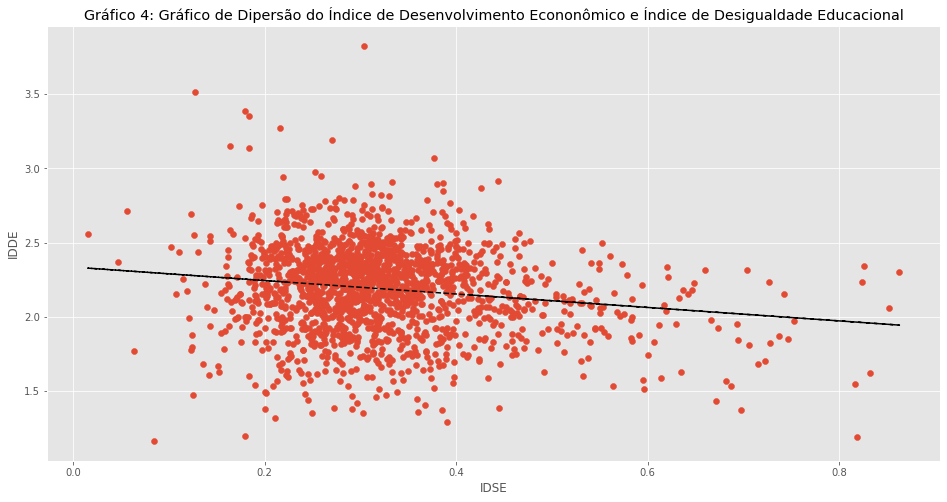

In [245]:
ax, fig = plt.subplots()
fig.scatter(ies_idde_inse['IDSE'], ies_idde_inse['IDDE'])

z = np.polyfit(ies_idde_inse['IDSE'], ies_idde_inse['IDDE'], 1)
p = np.poly1d(z)
fig.plot(ies_idde_inse['IDSE'],p(ies_idde_inse['IDSE']),"r--", color='black')
fig.set_title('Gráfico 4: Gráfico de Dipersão do Índice de Desenvolvimento Econonômico e Índice de Desigualdade Educacional')
fig.set_xlabel('IDSE')
fig.set_ylabel('IDDE')